In [1]:
import networkx as nx
import dataclasses
from src.vertex_params import VertexParams, VertexType

In [2]:
graph = nx.Graph()
graph.add_nodes_from(
    [(
        0,
        dataclasses.asdict(
            VertexParams(vertex_type=VertexType.START, position=(0.5, 0.5), level=0)
        ),
    )]
)

graph.add_nodes_from(
    [
        (0, dataclasses.asdict(
            VertexParams(vertex_type=VertexType.START, position=(0.5, 0.5), level=0))),
        (1, dataclasses.asdict(
            VertexParams(vertex_type=VertexType.EXTERIOR, position=(0.0, 0.0), level=1))),
        (2, dataclasses.asdict(
            VertexParams(vertex_type=VertexType.EXTERIOR, position=(0.0, 1.0), level=1))),
        (3, dataclasses.asdict(
            VertexParams(vertex_type=VertexType.EXTERIOR, position=(1.0, 0.0), level=1))),
        (4, dataclasses.asdict(
            VertexParams(vertex_type=VertexType.INTERIOR, position=None, level=1))),
        (5, dataclasses.asdict(
            VertexParams(vertex_type=VertexType.EXTERIOR, position=(0.5, 0.5), level=1))),
    ]
)

graph.add_edges_from(
    [
        (0, 4),

        (1, 4),
        (2, 4),
        (3, 4),

        (2, 5),
        (3, 5),
        (1, 3),
        (1, 2),
    ]
)

In [3]:
from src.visualization import draw

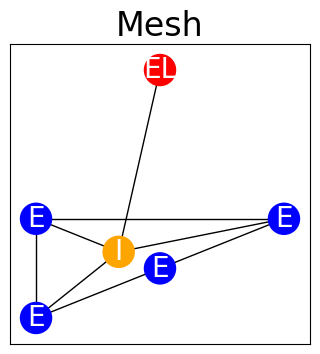

In [4]:
draw(graph, figsize=(3, 3))

In [5]:
from src.productions.production3 import Production3

In [6]:
prod3 = Production3()
subgraph = prod3.find_isomorphic_to_left_side(graph=graph)

In [7]:
new_graph = prod3.apply(graph=graph, subgraph=subgraph)

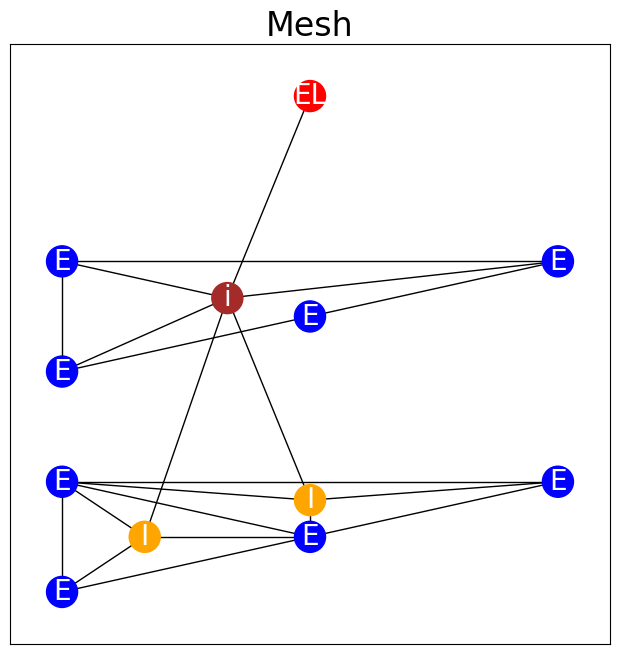

In [8]:
draw(new_graph, figsize=(6, 6))

Test visualization

In [9]:
def correct_graph_for_left_side_p3():
    graph = nx.Graph()
    graph.add_nodes_from([
        (
            0,
            dataclasses.asdict(
                VertexParams(
                    vertex_type=VertexType.EXTERIOR, position=(0.0, 0.0), level=1
                )
            ),
        ),
        (
            1,
            dataclasses.asdict(
                VertexParams(
                    vertex_type=VertexType.EXTERIOR, position=(0.0, 1.0), level=1
                )
            ),
        ),
        (
            2,
            dataclasses.asdict(
                VertexParams(
                    vertex_type=VertexType.EXTERIOR, position=(1.0, 1.0), level=1
                )
            ),
        ),
        (
            3,
            dataclasses.asdict(
                VertexParams(
                    vertex_type=VertexType.EXTERIOR, position=(0.5, 0.5), level=1
                )
            ),
        ),
        (
            4,
            dataclasses.asdict(
                VertexParams(
                    vertex_type=VertexType.INTERIOR, position=(1 / 3, 2 / 3), level=1
                )
            ),
        ),
    ])

    graph.add_edges_from([
        (0, 1),
        (1, 2),
        (2, 3),
        (3, 0),
        (4, 0),
        (4, 1),
        (4, 2)
    ])

    return graph

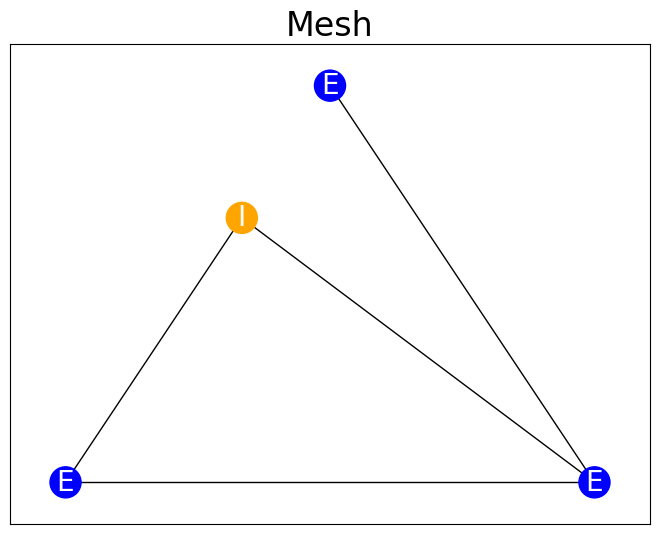

In [10]:
# test_should_not_transform_removed_node

graph = correct_graph_for_left_side_p3()
graph.remove_node(0)
draw(graph)

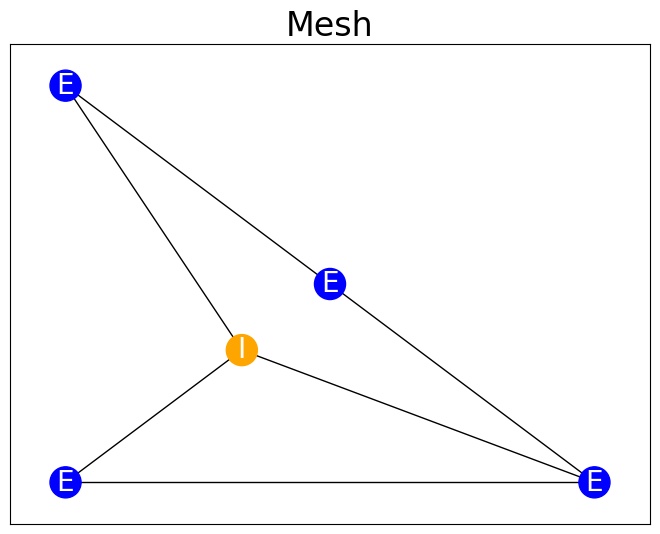

In [11]:
# test_should_not_transform_removed_edge

graph = correct_graph_for_left_side_p3()
graph.remove_edge(0, 1)
draw(graph)

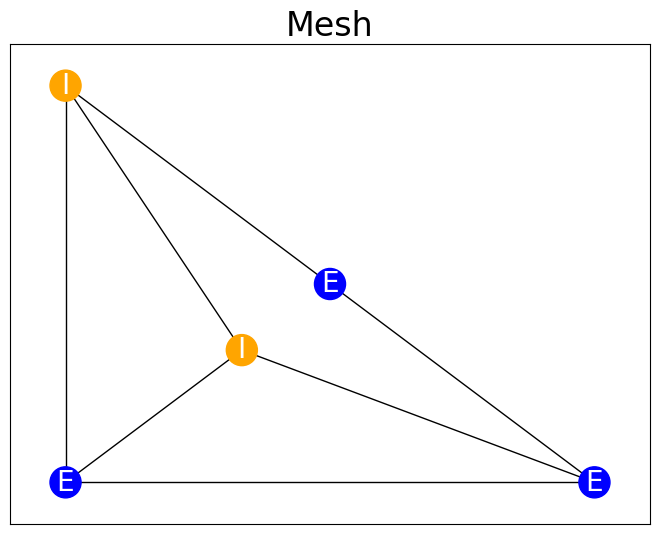

In [12]:
# test_should_not_transform_wrong_node_type

graph = correct_graph_for_left_side_p3()

old_node_0 = VertexParams(**graph.nodes[0])
graph.add_nodes_from([
    (
        0,
        dataclasses.asdict(
            dataclasses.replace(
                old_node_0, vertex_type=VertexType.INTERIOR
            )
        ),
    )
])

draw(graph)

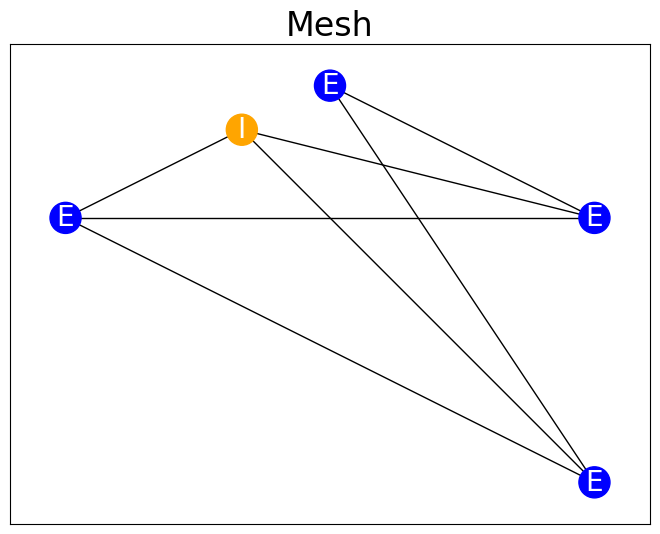

In [22]:
# test_should_not_transform_wrong_position

graph = correct_graph_for_left_side_p3()

old_node_0 = VertexParams(**graph.nodes[0])

graph.add_nodes_from([
    (
        0,
        dataclasses.asdict(
            dataclasses.replace(
                old_node_0, position=(1, 2)
            )
        ),
    )
])

draw(graph)

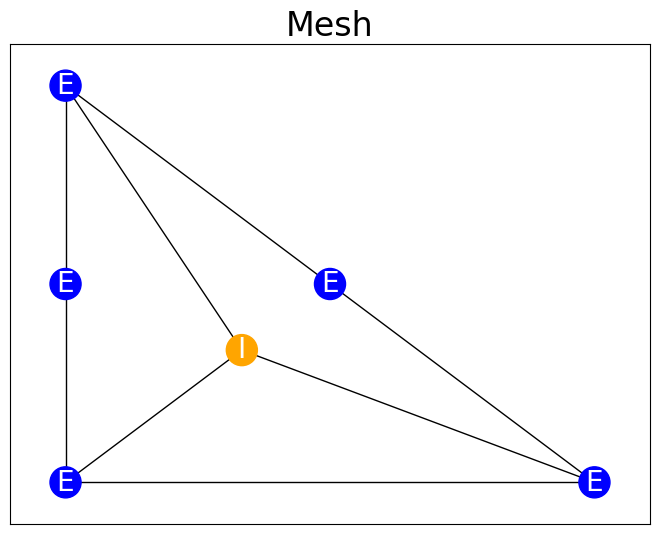

In [21]:
from tests.fixtures import mk_vertex

# test_should_not_transform_with_second_breaking_node_added

graph = correct_graph_for_left_side_p3()

graph.remove_edge(0, 1)
graph.add_nodes_from([(5, mk_vertex(VertexType.EXTERIOR, (0, 0.5), 1))])
graph.add_edges_from([(0, 5), (5, 1)])

draw(graph)